In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(88.29325905846923, -44.776614516004685),
 (-26.431853226223986, -7.292885508865112),
 (81.85803057248668, -100.99063523489346),
 (-17.812900797008325, 4.330041684162865),
 (79.10735981334997, -139.04534324371485),
 (-55.703044344590495, 98.05285291597482),
 (-19.343257025163453, -62.982121464680134),
 (8.346753587579258, -169.4256085131235),
 (31.37913380507493, 40.656670483060026),
 (-41.017742438126945, -67.12634914004019),
 (-76.7202314696465, -132.12836531988583),
 (3.4973255292847227, 86.34673354443447),
 (29.373224661335215, -53.2417993078256),
 (-82.67990480468156, -155.62025850788243),
 (80.52612376282852, -139.12644228848228),
 (-69.41248476149634, 14.881594962381286),
 (-33.95695132709291, -0.9443750638819779),
 (55.91726082354987, -59.470348773580454),
 (-55.5028900640488, -170.81871106477573),
 (-6.978948991517214, 16.84771024667745),
 (-53.58501586509339, 44.4731231987916),
 (4.349154528968498, 175.58322365723217),
 (-30.815524436486797, -170.60119735614967),
 (51.864310

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city cound to confirm sufficient count.
len(cities)

604

In [7]:
# Import the request library
import requests

# import the API key
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Import the time library and the datetime modeul from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities

    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("--------------------------")
print("Data Retieval Complete     ")
print("--------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | charagua
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | sakakah
Processing Record 10 of Set 1 | general roca
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | kasongo-lunda
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | nikolskoye
Processing Record

Processing Record 40 of Set 4 | arcachon
Processing Record 41 of Set 4 | veraval
Processing Record 42 of Set 4 | omboue
Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | zaragoza
Processing Record 45 of Set 4 | arman
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | bay roberts
Processing Record 48 of Set 4 | maltahohe
Processing Record 49 of Set 4 | abu samrah
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | betsiamites
Processing Record 3 of Set 5 | kem
Processing Record 4 of Set 5 | woodward
Processing Record 5 of Set 5 | semey
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | almeirim
Processing Record 10 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 5 | caledon
Processing Record 12 of Set 5 | krasnoarmeysk
Processing Record 13 of Set 5 |

Processing Record 27 of Set 8 | zhigansk
Processing Record 28 of Set 8 | ushirombo
Processing Record 29 of Set 8 | tomatlan
Processing Record 30 of Set 8 | kashi
Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | pandaria
Processing Record 33 of Set 8 | rawson
Processing Record 34 of Set 8 | boa vista
Processing Record 35 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 8 | bukachacha
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | tangzhai
Processing Record 39 of Set 8 | lufilufi
Processing Record 40 of Set 8 | khorramshahr
Processing Record 41 of Set 8 | dzilam gonzalez
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | la palma
Processing Record 44 of Set 8 | port moresby
Processing Record 45 of Set 8 | shelburne
Processing Record 46 of Set 8 | rawlins
Processing Record 47 of Set 8 | khipro
Processing Record 48 of Set 8 | trelew
Processing Record 49 of Set 8 | pacific grove
Processing Reco

Processing Record 18 of Set 12 | buckeye
Processing Record 19 of Set 12 | visby
Processing Record 20 of Set 12 | dalinghe
City not found. Skipping...
Processing Record 21 of Set 12 | rudbar
Processing Record 22 of Set 12 | grants pass
Processing Record 23 of Set 12 | lingao
Processing Record 24 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | ancud
Processing Record 27 of Set 12 | carutapera
Processing Record 28 of Set 12 | bambanglipuro
Processing Record 29 of Set 12 | leh
Processing Record 30 of Set 12 | vieste
Processing Record 31 of Set 12 | haibowan
City not found. Skipping...
Processing Record 32 of Set 12 | conceicao do araguaia
Processing Record 33 of Set 12 | aqtobe
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | samarai
Processing Record 36 of Set 12 | mogadishu
Processing Record 37 of Set 12 | buqayq
City not found. Skipping...
Processing Record 38 of Set 12 | coihaique

In [10]:
#  Convert the array of dictionaires to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-19.80,99,92,6.40,GL,2022-01-31 23:26:29
1,Jamestown,42.0970,-79.2353,29.84,50,0,5.75,US,2022-01-31 23:26:30
2,Yellowknife,62.4560,-114.3525,-9.58,83,20,5.75,CA,2022-01-31 23:26:30
3,Namibe,-15.1961,12.1522,72.28,73,96,8.25,AO,2022-01-31 23:25:45
4,Tuktoyaktuk,69.4541,-133.0374,-18.40,76,75,0.00,CA,2022-01-31 23:26:30
5,Busselton,-33.6500,115.3333,62.04,59,20,15.50,AU,2022-01-31 23:26:31
6,Charagua,-19.8000,-63.2167,78.37,68,97,2.55,BO,2022-01-31 23:26:31
7,Kapaa,22.0752,-159.3190,75.18,72,0,3.00,US,2022-01-31 23:22:23
8,Sakakah,29.9697,40.2064,47.77,54,2,10.87,SA,2022-01-31 23:26:31
9,General Roca,-39.0333,-67.5833,84.60,13,0,9.37,AR,2022-01-31 23:26:32


In [11]:
new_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-01-31 23:26:29,72.7868,-56.1549,-19.80,99,92,6.40
1,Jamestown,US,2022-01-31 23:26:30,42.0970,-79.2353,29.84,50,0,5.75
2,Yellowknife,CA,2022-01-31 23:26:30,62.4560,-114.3525,-9.58,83,20,5.75
3,Namibe,AO,2022-01-31 23:25:45,-15.1961,12.1522,72.28,73,96,8.25
4,Tuktoyaktuk,CA,2022-01-31 23:26:30,69.4541,-133.0374,-18.40,76,75,0.00
5,Busselton,AU,2022-01-31 23:26:31,-33.6500,115.3333,62.04,59,20,15.50
6,Charagua,BO,2022-01-31 23:26:31,-19.8000,-63.2167,78.37,68,97,2.55
7,Kapaa,US,2022-01-31 23:22:23,22.0752,-159.3190,75.18,72,0,3.00
8,Sakakah,SA,2022-01-31 23:26:31,29.9697,40.2064,47.77,54,2,10.87
9,General Roca,AR,2022-01-31 23:26:32,-39.0333,-67.5833,84.60,13,0,9.37


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

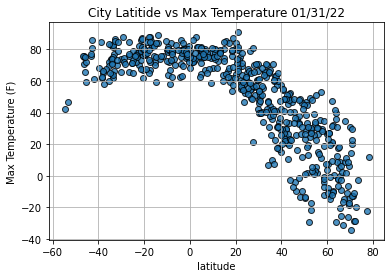

In [14]:
# Import time module
import time

# Build the scatter plots for lattitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

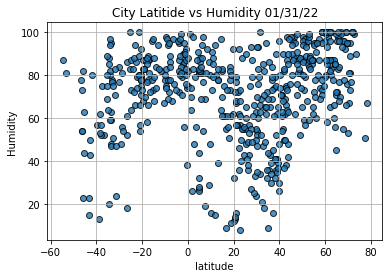

In [15]:
# Build the scatter plots for lattitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

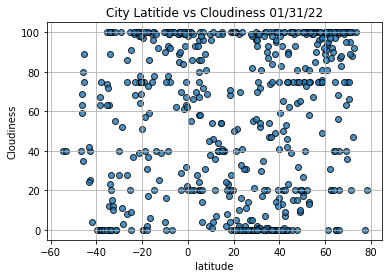

In [16]:
# Build the scatter plots for lattitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

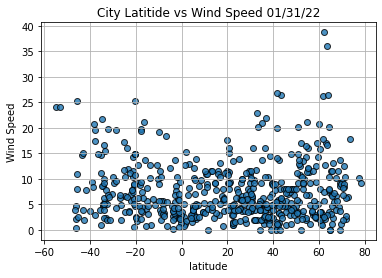

In [17]:
# Build the scatter plots for lattitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on teh weather data
# and plot a regression line and the equation wtih teh data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-01-31 23:26:33
Lat                      -46.1927
Lng                      168.8643
Max Temp                    75.47
Humidity                       54
Cloudiness                     63
Wind Speed                   2.15
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
550    False
551     True
552    False
553    False
554     True
Name: Lat, Length: 555, dtype: bool

In [30]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-01-31 23:26:29,72.7868,-56.1549,-19.80,99,92,6.40
1,Jamestown,US,2022-01-31 23:26:30,42.0970,-79.2353,29.84,50,0,5.75
2,Yellowknife,CA,2022-01-31 23:26:30,62.4560,-114.3525,-9.58,83,20,5.75
4,Tuktoyaktuk,CA,2022-01-31 23:26:30,69.4541,-133.0374,-18.40,76,75,0.00
7,Kapaa,US,2022-01-31 23:22:23,22.0752,-159.3190,75.18,72,0,3.00
...,...,...,...,...,...,...,...,...,...
547,Daur,PK,2022-01-31 23:40:24,26.4583,68.3192,58.91,38,0,5.82
548,Sistranda,NO,2022-01-31 23:37:12,63.7256,8.8340,35.91,60,100,16.60
549,Balkanabat,TM,2022-01-31 23:40:24,39.5108,54.3671,47.05,37,12,4.94
551,Hirado,JP,2022-01-31 23:40:25,33.3597,129.5531,40.35,71,98,20.15


In [29]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Namibe,AO,2022-01-31 23:25:45,-15.1961,12.1522,72.28,73,96,8.25
5,Busselton,AU,2022-01-31 23:26:31,-33.6500,115.3333,62.04,59,20,15.50
6,Charagua,BO,2022-01-31 23:26:31,-19.8000,-63.2167,78.37,68,97,2.55
9,General Roca,AR,2022-01-31 23:26:32,-39.0333,-67.5833,84.60,13,0,9.37
10,Rikitea,PF,2022-01-31 23:23:00,-23.1203,-134.9692,77.70,66,68,3.69
...,...,...,...,...,...,...,...,...,...
537,Samarai,PG,2022-01-31 23:40:20,-10.6167,150.6667,85.08,67,100,12.66
539,Coihaique,CL,2022-01-31 23:39:02,-45.5752,-72.0662,59.61,63,75,8.05
550,San Juan,AR,2022-01-31 23:39:53,-31.5375,-68.5364,84.79,24,0,6.53
552,Inhambane,MZ,2022-01-31 23:41:25,-23.8650,35.3833,75.52,83,37,6.51


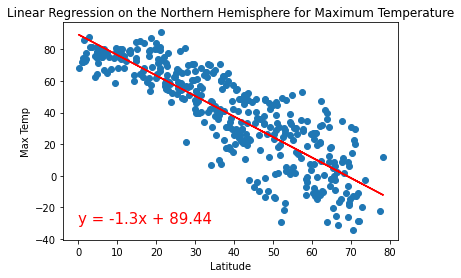

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Maximum Temperature", 'Max Temp',(0,-30))

In [38]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=-1.299344197015597, intercept=89.44208201689858, rvalue=-0.8496364087905497, pvalue=9.371406947847313e-109, stderr=0.0411566494732514, intercept_stderr=1.78798144222422)

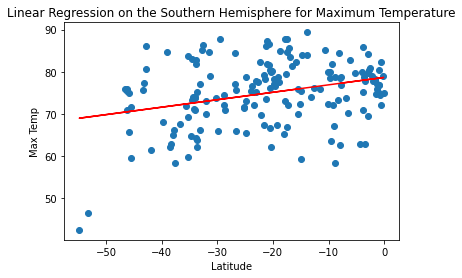

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Maximum Temperature", 'Max Temp',(0,-30))

In [36]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.176733490903818, intercept=78.66080104126756, rvalue=0.30672722354156823, pvalue=4.990579954948925e-05, stderr=0.04243779784261206, intercept_stderr=1.063039939563098)

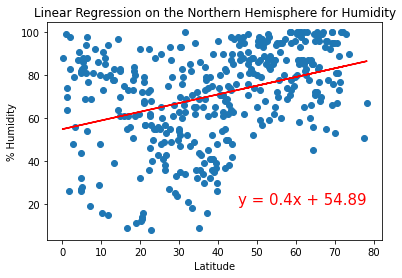

In [45]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Humidity", '% Humidity',(45,20))

In [46]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.40476613737333766, intercept=54.89144687689851, rvalue=0.35968708901725754, pvalue=3.1181363331982767e-13, stderr=0.05358328404516056, intercept_stderr=2.3278356890650818)

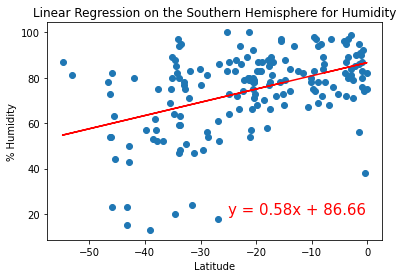

In [47]:
# Linear regression on the Souththern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Humidity", '% Humidity',(-25,20))

In [48]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.5828098950797556, intercept=86.66026735720271, rvalue=0.45028755591311226, pvalue=8.1208180240353e-10, stderr=0.08942801285869835, intercept_stderr=2.240115044072874)

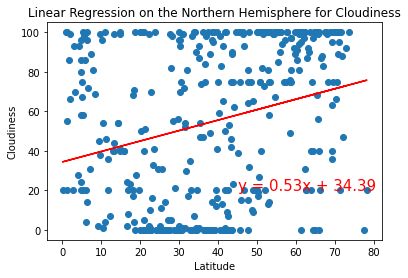

In [52]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Cloudiness", 'Cloudiness',(45,20))

In [53]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.5290132293095631, intercept=34.387036576530754, rvalue=0.2660098898731708, pvalue=1.1254902714017706e-07, stderr=0.09782881444895519, intercept_stderr=4.250008370171393)

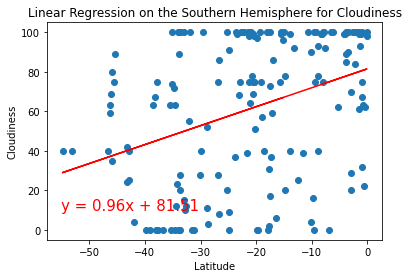

In [54]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Cloudiness", 'Cloudiness',(-55,10))

In [55]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.9586210823690846, intercept=81.51123036133451, rvalue=0.35766949913298973, pvalue=1.8052966418630708e-06, stderr=0.19367926885292247, intercept_stderr=4.851542933957367)

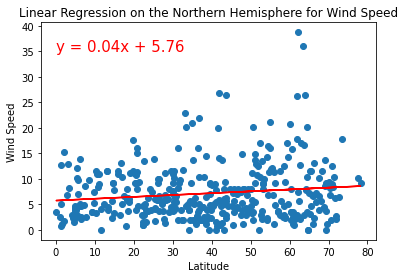

In [60]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
for Wind Speed", 'Wind Speed',(0,35))

In [61]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=0.036245634512080696, intercept=5.7578079587378195, rvalue=0.13105430698659012, pvalue=0.009949367966630767, stderr=0.013991904841346764, intercept_stderr=0.6078547821040315)

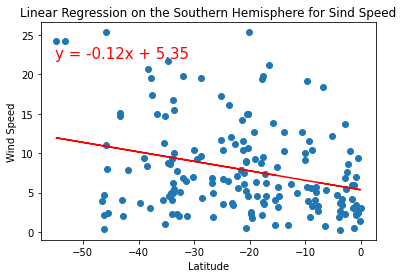

In [62]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
for Sind Speed", 'Wind Speed',(-55,22))

In [63]:
# Check correlation coefficients
linregress(x_values, y_values)

LinregressResult(slope=-0.12033519292643322, intercept=5.350776070906275, rvalue=-0.2867348978687686, pvalue=0.0001571032012409782, stderr=0.031111711119330213, intercept_stderr=0.7793286454366526)